In [1]:
from detect import run
from datetime import datetime

<h2>Inference of yolo v5s model (trained from scratch)</h2>
<ul>
    <li>Trained for 150 epochs</li>
    <li>Inferred on 30 images</li>
    <li>Average 6-7 FPS</li>
    <li>Inferred in CPU i7-7700HQ</li>

In [2]:
start_time = datetime.now()
run(imgsz=(448, 448), source=r"data\name_plate\valid\images", weights=r"runs\train\exp14\weights\best.pt", conf_thres=0.4, device="cpu")
time_taken = datetime.now()-start_time
print("total inference time", time_taken, "average time per frame", time_taken/30, "fps", 30/time_taken.total_seconds())

YOLOv5  2022-1-12 torch 1.8.2 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/30 C:\Users\Dhanraj Katkar\Desktop\github\yolov5\data\name_plate\valid\images\car_102_jpg.rf.0b22a43a44ce5a45e43cb542dd263e80.jpg: 256x448 1 license_plate, Done. (0.078s)


image 2/30 C:\Users\Dhanraj Katkar\Desktop\github\yolov5\data\name_plate\valid\images\car_113_jpg.rf.585aed5e4e4980a26a43dc39b7048246.jpg: 320x448 1 license_plate, Done. (0.116s)
image 3/30 C:\Users\Dhanraj Katkar\Desktop\github\yolov5\data\name_plate\valid\images\car_114_jpg.rf.dd59fc2fccc231b6bfd92679a5cb36d2.jpg: 448x448 Done. (0.138s)
image 4/30 C:\Users\Dhanraj Katkar\Desktop\github\yolov5\data\name_plate\valid\images\car_122_jpg.rf.cfbd6a364b0ed5f58b6910633913afc3.jpg: 320x448 1 license_plate, Done. (0.103s)
image 5/30 C:\Users\Dhanraj Katkar\Desktop\github\yolov5\data\name_plate\valid\images\car_124_jpg.rf.d5e798e25b7a02a193fca88dca4f8705.jpg: 352x448 1 license_plate, Done. (0.133s)
image 6/30 C:\Users\Dhanraj Katkar\Desktop\github\yolov5\data\name_plate\valid\images\car_127_jpg.rf.269399946860e17f09e2646e9abedd6c.jpg: 256x448 1 license_plate, Done. (0.087s)
image 7/30 C:\Users\Dhanraj Katkar\Desktop\github\yolov5\data\name_plate\valid\images\car_130_jpg.rf.f3aa1b9d9bcff176d8b2f

total inference time 0:00:04.444120 average time per frame 0:00:00.148137 fps 6.7504927859733765


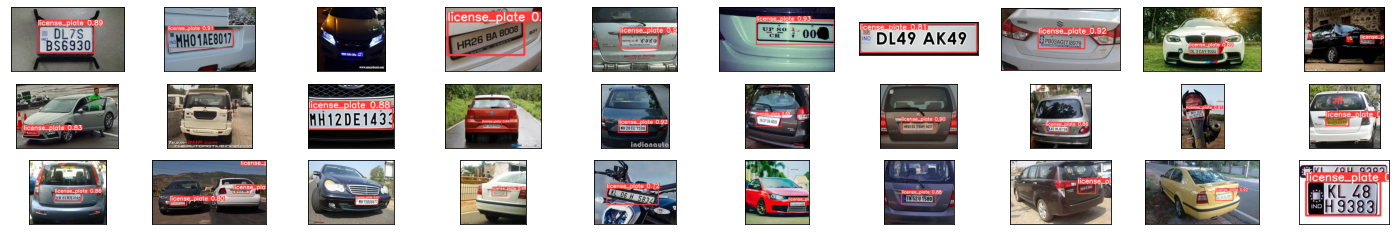

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from skimage import io


output_path = "runs\detect\exp"
imgs = os.scandir(output_path)
images = [ io.imread(i.path) for i in imgs]

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(30):
    ax = fig.add_subplot(3, int(30/3), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')

<h2>converted model to onnx</h2>

In [4]:
 !python export.py --weights runs/train/exp14/weights/best.pt --include onnx --device cpu --batch-size 1 --img 448

export: data=data\coco128.yaml, weights=['runs/train/exp14/weights/best.pt'], imgsz=[448], batch_size=1, device=cpu, half=False, inplace=False, train=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5  2022-1-12 torch 1.8.2 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs\train\exp14\weights\best.pt (56.9 MB)

ONNX: starting export with onnx 1.10.2...
C:\Users\Dhanraj Katkar\Desktop\github\yolov5\models\yolo.py:57: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if self.onnx_dynamic or self.grid[i].shape[2:4] != x[i].shape[2:

<h2>Yolo v5s model ONNX</h2>
    <li>Trained for 150 epochs</li>
    <li>Inferred on 30 images</li>
    <li>Average 11-13 FPS</li>
    <li>Inferred in CPU i7-7700HQ</li>

In [5]:
start_time = datetime.now()
run(imgsz=(448, 448), source=r"data\name_plate\valid\images", weights=r"runs\train\exp14\weights\best.onnx", conf_thres=0.4, device="cpu")
time_taken = datetime.now()-start_time
print("total inference time", time_taken, "average time per frame", time_taken/30, "fps", 30/time_taken.total_seconds())

YOLOv5  2022-1-12 torch 1.8.2 CPU

Loading runs\train\exp14\weights\best.onnx for ONNX Runtime inference...
image 1/30 C:\Users\Dhanraj Katkar\Desktop\github\yolov5\data\name_plate\valid\images\car_102_jpg.rf.0b22a43a44ce5a45e43cb542dd263e80.jpg: 448x448 1 person, Done. (0.059s)
image 2/30 C:\Users\Dhanraj Katkar\Desktop\github\yolov5\data\name_plate\valid\images\car_113_jpg.rf.585aed5e4e4980a26a43dc39b7048246.jpg: 448x448 1 person, Done. (0.058s)


image 3/30 C:\Users\Dhanraj Katkar\Desktop\github\yolov5\data\name_plate\valid\images\car_114_jpg.rf.dd59fc2fccc231b6bfd92679a5cb36d2.jpg: 448x448 Done. (0.059s)
image 4/30 C:\Users\Dhanraj Katkar\Desktop\github\yolov5\data\name_plate\valid\images\car_122_jpg.rf.cfbd6a364b0ed5f58b6910633913afc3.jpg: 448x448 1 person, Done. (0.062s)
image 5/30 C:\Users\Dhanraj Katkar\Desktop\github\yolov5\data\name_plate\valid\images\car_124_jpg.rf.d5e798e25b7a02a193fca88dca4f8705.jpg: 448x448 1 person, Done. (0.061s)
image 6/30 C:\Users\Dhanraj Katkar\Desktop\github\yolov5\data\name_plate\valid\images\car_127_jpg.rf.269399946860e17f09e2646e9abedd6c.jpg: 448x448 1 person, Done. (0.052s)
image 7/30 C:\Users\Dhanraj Katkar\Desktop\github\yolov5\data\name_plate\valid\images\car_130_jpg.rf.f3aa1b9d9bcff176d8b2ff3cbcb6253d.jpg: 448x448 1 person, Done. (0.056s)
image 8/30 C:\Users\Dhanraj Katkar\Desktop\github\yolov5\data\name_plate\valid\images\car_14_jpg.rf.31c0c6c772616e05033f2df12a7442e5.jpg: 448x448 1 pe

total inference time 0:00:02.551356 average time per frame 0:00:00.085045 fps 11.75845315197095


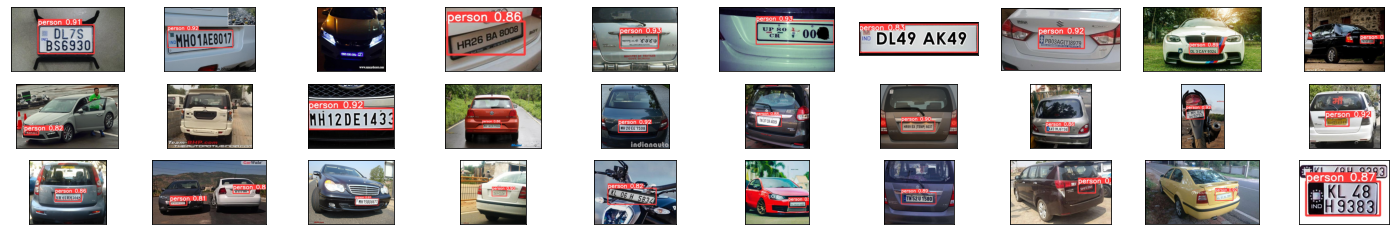

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from skimage import io


output_path = "runs\detect\exp2"
imgs = os.scandir(output_path)
images = [ io.imread(i.path) for i in imgs]

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(30):
    ax = fig.add_subplot(3, int(30/3), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')